In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from codecarbon import EmissionsTracker
from sklearn.metrics import classification_report
import numpy as np


In [2]:
# 1. Suivi énergétique
tracker = EmissionsTracker(project_name="CNN_From_Scratch")
tracker.start()


[codecarbon WARNING @ 19:20:01] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 19:20:01] [setup] RAM Tracking...
[codecarbon INFO @ 19:20:01] [setup] CPU Tracking...
[codecarbon WARNING @ 19:20:02] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Windows OS detected: Please install Intel Power Gadget to measure CPU

[codecarbon INFO @ 19:20:02] CPU Model on constant consumption mode: Intel(R) Core(TM) i5-9300H CPU @ 2.40GHz
[codecarbon WARNING @ 19:20:02] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 19:20:02] [setup] GPU Tracking...
[codecarbon INFO @ 19:20:02] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 19:20:03] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
                CPU Tracking Method: global constant
                GPU Tracking Method: pynvml
            
[codecarbon INFO @ 19:20:03] >>> Tracker's m

In [3]:
# 2. Charger les données
train_ds = tf.keras.utils.image_dataset_from_directory(
    'banana_sushi/train', image_size=(128, 128), batch_size=16, label_mode='categorical'
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    'banana_sushi/val', image_size=(128, 128), batch_size=16, label_mode='categorical', shuffle=False
)

Found 287 files belonging to 4 classes.
Found 141 files belonging to 4 classes.


In [4]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
])

In [5]:
# 3. Construction du Modèle CNN from Scratch
model = models.Sequential([
    layers.Input(shape=(128, 128, 3)),
    layers.Rescaling(1./255), # Normalisation cruciale
    data_augmentation,
     # Premier bloc : Capture les formes simples
    layers.Conv2D(32, (2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Deuxième bloc : Formes plus complexes
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Troisième bloc : Détails fins (Sushi/Pizza)
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Quatrième bloc : Caractéristiques très fines
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Compression spatiale (GAP), interprétation dense avec dropout et classification finale en 4 classes.
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')
])

In [6]:
# 4. Compilation
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# On s'arrête si le modèle n'apprend plus pour éviter de détruire l'accuracy
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [7]:
# 5. Entraînement
history = model.fit(
    train_ds, 
    validation_data=val_ds, 
    epochs=30, 
    callbacks=[early_stop]
)

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - accuracy: 0.2683 - loss: 1.3872 - val_accuracy: 0.5106 - val_loss: 1.2822
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - accuracy: 0.4425 - loss: 1.1688 - val_accuracy: 0.4610 - val_loss: 1.0832
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step - accuracy: 0.5575 - loss: 0.9909 - val_accuracy: 0.7305 - val_loss: 0.7281
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - accuracy: 0.6272 - loss: 0.8036 - val_accuracy: 0.7518 - val_loss: 0.5928
Epoch 5/30
11/18 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.6670 - loss: 0.7022

[codecarbon INFO @ 19:20:23] Energy consumed for RAM : 0.000042 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 19:20:23] Delta energy consumed for CPU with constant : 0.000751 kWh, power : 180.0 W
[codecarbon INFO @ 19:20:23] Energy consumed for All CPU : 0.000751 kWh
[codecarbon INFO @ 19:20:23] Energy consumed for all GPUs : 0.000009 kWh. Total GPU Power : 2.1780562571025492 W
[codecarbon INFO @ 19:20:23] 0.000801 kWh of electricity and 0.000000 L of water were used since the beginning.


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - accuracy: 0.6237 - loss: 0.7328 - val_accuracy: 0.6596 - val_loss: 0.8850
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - accuracy: 0.6481 - loss: 0.7336 - val_accuracy: 0.7660 - val_loss: 0.5343
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - accuracy: 0.6620 - loss: 0.6780 - val_accuracy: 0.7447 - val_loss: 0.5385
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - accuracy: 0.6620 - loss: 0.6858 - val_accuracy: 0.7589 - val_loss: 0.4764
Epoch 9/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - accuracy: 0.7178 - loss: 0.5906 - val_accuracy: 0.7660 - val_loss: 0.3942
Epoch 10/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - accuracy: 0.7073 - loss: 0.5883 - val_accuracy: 0.8014 - val_loss: 0.4200
Epoch 11/30
 6/18 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.6661 - loss: 0.6824

[codecarbon INFO @ 19:20:38] Energy consumed for RAM : 0.000083 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 19:20:38] Delta energy consumed for CPU with constant : 0.000751 kWh, power : 180.0 W
[codecarbon INFO @ 19:20:38] Energy consumed for All CPU : 0.001502 kWh
[codecarbon INFO @ 19:20:38] Energy consumed for all GPUs : 0.000018 kWh. Total GPU Power : 2.1938500550786304 W
[codecarbon INFO @ 19:20:38] 0.001603 kWh of electricity and 0.000000 L of water were used since the beginning.


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step - accuracy: 0.7178 - loss: 0.6017 - val_accuracy: 0.8156 - val_loss: 0.3938
Epoch 12/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - accuracy: 0.7213 - loss: 0.5251 - val_accuracy: 0.8227 - val_loss: 0.3795
Epoch 13/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - accuracy: 0.7352 - loss: 0.5427 - val_accuracy: 0.8298 - val_loss: 0.3937
Epoch 14/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - accuracy: 0.7456 - loss: 0.5934 - val_accuracy: 0.8369 - val_loss: 0.3932
Epoch 15/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - accuracy: 0.7073 - loss: 0.5790 - val_accuracy: 0.8156 - val_loss: 0.4609
Epoch 16/30
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.7537 - loss: 0.5728

[codecarbon INFO @ 19:20:53] Energy consumed for RAM : 0.000125 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 19:20:53] Delta energy consumed for CPU with constant : 0.000750 kWh, power : 180.0 W


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.7540 - loss: 0.5706

[codecarbon INFO @ 19:20:53] Energy consumed for All CPU : 0.002252 kWh
[codecarbon INFO @ 19:20:53] Energy consumed for all GPUs : 0.000027 kWh. Total GPU Power : 2.190101139284305 W
[codecarbon INFO @ 19:20:53] 0.002404 kWh of electricity and 0.000000 L of water were used since the beginning.


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 154ms/step - accuracy: 0.7596 - loss: 0.5337 - val_accuracy: 0.8156 - val_loss: 0.3802
Epoch 17/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 160ms/step - accuracy: 0.7526 - loss: 0.5313 - val_accuracy: 0.7943 - val_loss: 0.4607
Epoch 18/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - accuracy: 0.7700 - loss: 0.4840 - val_accuracy: 0.8085 - val_loss: 0.3725
Epoch 19/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - accuracy: 0.7735 - loss: 0.4626 - val_accuracy: 0.8085 - val_loss: 0.4221
Epoch 20/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - accuracy: 0.7909 - loss: 0.4629 - val_accuracy: 0.8652 - val_loss: 0.3837
Epoch 21/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - accuracy: 0.8014 - loss: 0.4877 - val_accuracy: 0.7589 - val_loss: 0.4909
Epoch 22/30
 5/18 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 0.7583 - loss: 0.4222

[codecarbon INFO @ 19:21:08] Energy consumed for RAM : 0.000167 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 19:21:08] Delta energy consumed for CPU with constant : 0.000750 kWh, power : 180.0 W


 6/18 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - accuracy: 0.7569 - loss: 0.4291

[codecarbon INFO @ 19:21:08] Energy consumed for All CPU : 0.003002 kWh
[codecarbon INFO @ 19:21:08] Energy consumed for all GPUs : 0.000037 kWh. Total GPU Power : 2.199227752307483 W
[codecarbon INFO @ 19:21:08] 0.003205 kWh of electricity and 0.000000 L of water were used since the beginning.


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - accuracy: 0.7944 - loss: 0.4369 - val_accuracy: 0.7872 - val_loss: 0.3787
Epoch 23/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - accuracy: 0.7770 - loss: 0.4381 - val_accuracy: 0.7872 - val_loss: 0.4285
Epoch 24/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step - accuracy: 0.7875 - loss: 0.4712 - val_accuracy: 0.7943 - val_loss: 0.3799
Epoch 25/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 156ms/step - accuracy: 0.8084 - loss: 0.4371 - val_accuracy: 0.7660 - val_loss: 0.4452
Epoch 26/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - accuracy: 0.8118 - loss: 0.4180 - val_accuracy: 0.8085 - val_loss: 0.3534
Epoch 27/30
 9/18 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 0.7626 - loss: 0.4909

[codecarbon INFO @ 19:21:23] Energy consumed for RAM : 0.000208 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 19:21:23] Delta energy consumed for CPU with constant : 0.000750 kWh, power : 180.0 W
[codecarbon INFO @ 19:21:23] Energy consumed for All CPU : 0.003752 kWh
[codecarbon INFO @ 19:21:23] Energy consumed for all GPUs : 0.000046 kWh. Total GPU Power : 2.193926355472892 W
[codecarbon INFO @ 19:21:23] 0.004006 kWh of electricity and 0.000000 L of water were used since the beginning.


18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 226ms/step - accuracy: 0.7944 - loss: 0.4487 - val_accuracy: 0.8582 - val_loss: 0.3960
Epoch 28/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 206ms/step - accuracy: 0.7805 - loss: 0.5047 - val_accuracy: 0.8014 - val_loss: 0.4947
Epoch 29/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 172ms/step - accuracy: 0.8118 - loss: 0.4206 - val_accuracy: 0.8156 - val_loss: 0.3733
Epoch 30/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - accuracy: 0.8293 - loss: 0.4181 - val_accuracy: 0.8085 - val_loss: 0.3791


In [8]:
# 6. Fin et Évaluation
emissions = tracker.stop()
print("\n" + "="*30)
print("RÉSULTATS D'ÉVALUATION")
print("="*30)

y_true = []
y_pred = []

# Extraction des prédictions sur le jeu de validation
for images, labels in val_ds:
    preds = model.predict(images, verbose=0)
    y_true.extend(np.argmax(labels, axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

# Affichage du rapport complet (F1-score inclus)
target_names = train_ds.class_names
print(classification_report(y_true, y_pred, target_names=target_names))

print(f"\n[BILAN ÉNERGÉTIQUE] Consommation : {emissions:.6f} kg CO2")

[codecarbon INFO @ 19:21:36] Energy consumed for RAM : 0.000242 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 19:21:36] Delta energy consumed for CPU with constant : 0.000607 kWh, power : 180.0 W
[codecarbon INFO @ 19:21:36] Energy consumed for All CPU : 0.004360 kWh
[codecarbon INFO @ 19:21:36] Energy consumed for all GPUs : 0.000053 kWh. Total GPU Power : 2.197906673584322 W
[codecarbon INFO @ 19:21:36] 0.004655 kWh of electricity and 0.000000 L of water were used since the beginning.



RÉSULTATS D'ÉVALUATION
              precision    recall  f1-score   support

      banana       0.98      0.98      0.98        65
       pizza       0.55      0.72      0.62        25
       sushi       0.58      0.48      0.53        31
      tomato       1.00      0.85      0.92        20

    accuracy                           0.81       141
   macro avg       0.78      0.76      0.76       141
weighted avg       0.82      0.81      0.81       141


[BILAN ÉNERGÉTIQUE] Consommation : 0.000261 kg CO2


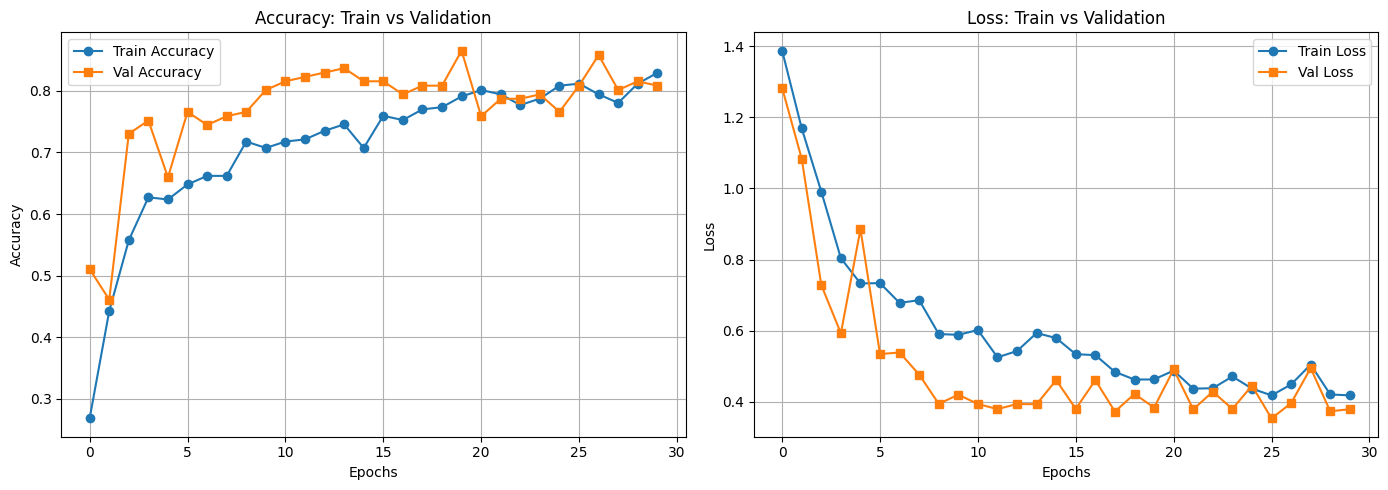

Graphique sauvegardé: mlp_training_curves.png


In [9]:
import matplotlib.pyplot as plt

# Extraction des métriques
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

# Création des graphiques
plt.figure(figsize=(14, 5))

# Courbe d'Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Val Accuracy', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy: Train vs Validation')
plt.legend()
plt.grid(True)

# Courbe de Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Val Loss', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss: Train vs Validation')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('mlp_training_curves.png', dpi=300, bbox_inches='tight')
plt.show()

print("Graphique sauvegardé: mlp_training_curves.png")